In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from ipynb.fs.defs.tdc_data_analysis import line_hist

In [2]:
background= pd.read_csv('background11.csv',index_col=False)

In [3]:
signal = pd.read_csv('signal_tentative8.csv',index_col=False)

In [35]:
len(signal)

620000

In [36]:
len(background)

580000

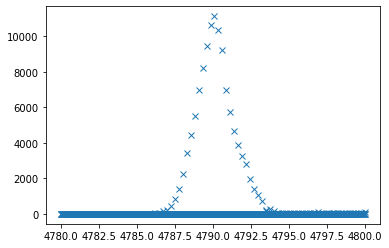

In [64]:
x_sg_t,y_sg_t = line_hist(signal.delta_t*1e9,normalized=False,bins=np.linspace(4780,4800,1000),linestyle='None')

In [9]:
df = pd.read_csv('preprocessed11.csv')

<AxesSubplot:xlabel='x', ylabel='y'>

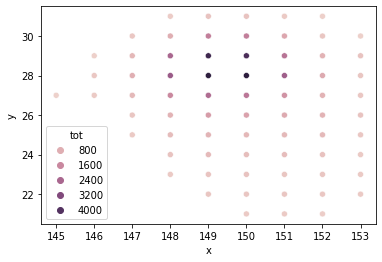

In [19]:
sns.scatterplot(data=df[df['batch']  == 100],x='x',y='y',hue='tot')

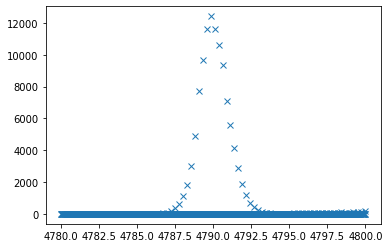

In [63]:
x_bg_t,y_bg_t = line_hist(background.delta_t*1e9,normalized=False,bins=np.linspace(4780,4800,1000),
                          linestyle='None')

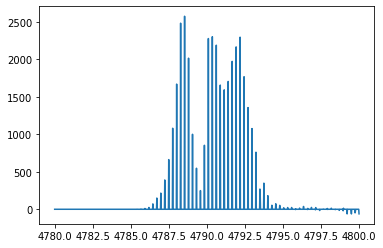

In [73]:
plt.plot(x_bg_t,1.25*y_sg_t-y_bg_t,linestyle='-')

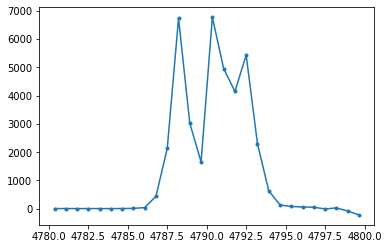

In [56]:
plt.plot(x_bg_t,1.25*y_sg_t-y_bg_t,linestyle='-',marker='.')

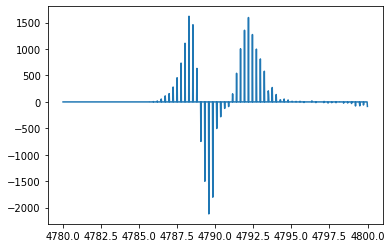

In [6]:
plt.plot(x_bg_t,y_sg_t-y_bg_t)

In [7]:
def get_fit_pts(xarr,yarr,threshold=300):
    mask = (yarr>threshold)
    xarr = xarr[mask]
    yarr = yarr[mask]
    xarr = xarr
    plt.plot(xarr,yarr)
    plt.show()
    return xarr,yarr

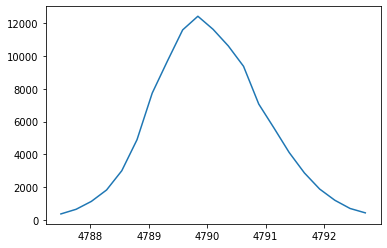

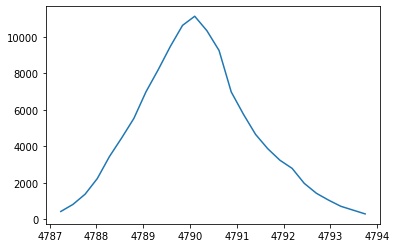

In [8]:
x_bg_t, y_bg_t = get_fit_pts(x_bg_t,y_bg_t)
x_sg_t, y_sg_t = get_fit_pts(x_sg_t,y_sg_t)

In [24]:
from scipy.optimize import curve_fit

In [25]:
def fit_f(x,m1,s1,a1):
    y = a1*np.exp(-(x-m1)**2/s1**2)
    return y
def plot_f(m1,s1,a1):
    x_tmp = np.linspace(4780,4800,5000)
    y_tmp = fit_f(x_tmp,m1,s1,a1)
    return y_tmp

In [26]:
def fit_to_curve(x_bg_t,y_bg_t,a0):
    fit_param_bg, fit_cov_bg =curve_fit(fit_f,x_bg_t,y_bg_t,p0=[-2, 4790, a0])
    print('Mean1:%f\n Std1: %f\n Amp1: %f\n' % tuple(fit_param_bg),'\n')
    print(fit_cov_bg)
    y_f = plot_f(*fit_param_bg)
    plt.plot(x_bg_t,y_bg_t,linestyle='None',marker='x')
    plt.show()
    return y_f

Mean1:4789.982236
 Std1: 1.313529
 Amp1: 12093.965041
 

[[ 3.47297216e-04 -6.02504711e-07  2.53276483e-03]
 [-6.02504711e-07  6.98208879e-04 -3.21218899e+00]
 [ 2.53276483e-03 -3.21218899e+00  4.42003241e+04]]


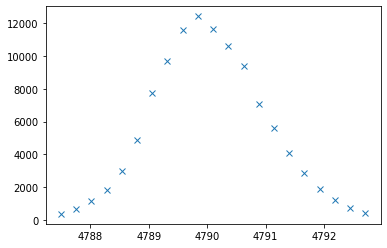

In [27]:
y_bg_fit =fit_to_curve(x_bg_t,y_bg_t,12000)

Mean1:4790.045735
 Std1: -1.649232
 Amp1: 10304.826595
 

[[8.85101736e-04 6.91082950e-06 1.85085675e-02]
 [6.91082950e-06 1.80096520e-03 5.61076959e+00]
 [1.85085675e-02 5.61076959e+00 5.19373217e+04]]


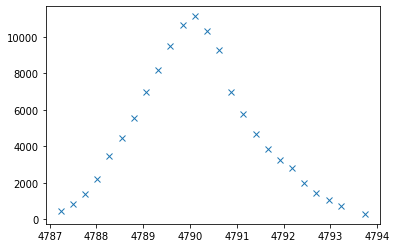

In [28]:
y_sg_fit = fit_to_curve(x_sg_t,y_sg_t,12000)

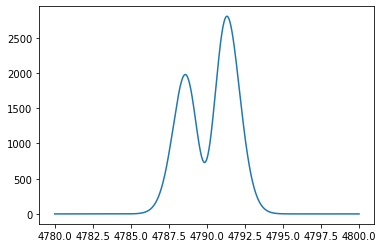

In [59]:
plt.plot(np.linspace(4780,4800,5000),y_sg_fit*1.25-y_bg_fit)

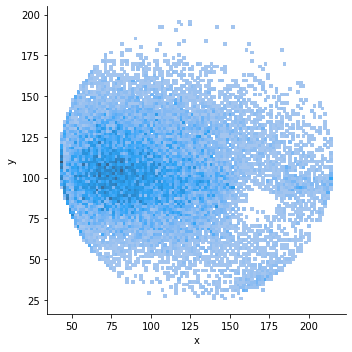

In [79]:
sns.displot(data=signal[signal['delta_t']*1e9<4795]-0*background[background['delta_t']*1e9<4795]
            ,x='x',y='y',bins=100)

In [163]:
signal_th = signal[signal['delta_t']*1e9<4795]
background_th = background[background['delta_t']*1e9<4795]
signal_hist = np.histogram2d(signal_th['y'],signal_th['delta_t']*1e9,bins=(np.linspace(0,255,100),np.linspace(4780,4800,30)))
background_hist = np.histogram2d(background_th['y'],background_th['delta_t']*1e9,bins=(np.linspace(0,255,100),np.linspace(4780,4800,30)))

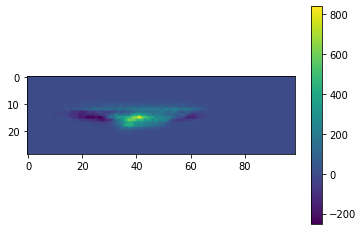

In [167]:
plt.imshow(1.25*signal_hist[0].T-background_hist[0].T)
plt.colorbar()

In [150]:
signal_hist[0].T

array([[0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e

In [116]:
np.min(1.25*signal_hist[0].T-background_hist[0].T)

-61.25

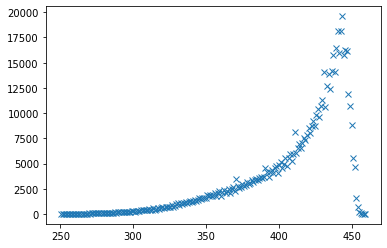

In [112]:
_,_=line_hist(tpx_data.toa2,normalized=False
          ,bins=np.linspace(250,460,200)
         ,linestyle='None')

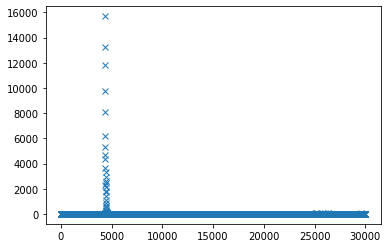

In [133]:
x,y=line_hist(tpx_data.toa1,normalized=False,
              bins=np.linspace(0,30000,5000),
         linestyle='None')

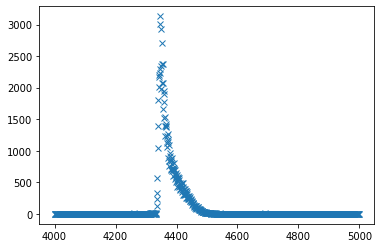

In [134]:
x,y=line_hist(tpx_data.toa1,normalized=False,
              bins=range(4000,5000),
         linestyle='None')

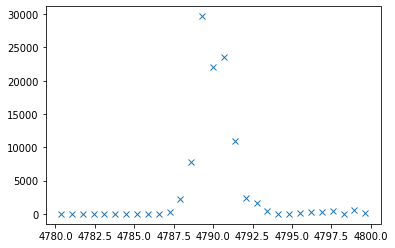

In [144]:
x,y=line_hist(tpx_data.delta_t,normalized=False,
              bins=np.linspace(4780,4800,30),
         linestyle='None')

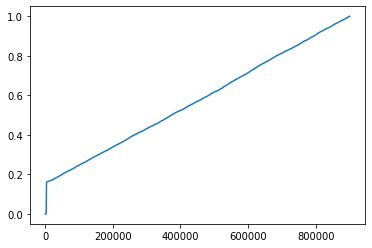

In [136]:
plt.plot(x,np.cumsum(y)/np.cumsum(y)[-1])

In [170]:
batches = tpx_data.groupby('batch').sum()

In [171]:
batches['toa1'] = batches['toa1']/batches['ones']
batches['toa2'] = batches['toa2']/batches['ones']
batches['delta_t'] = batches['delta_t']/batches['ones']
batches['x'] = batches['totx']/batches['tot']
batches['y'] = batches['toty']/batches['tot']
batches.drop(['toa','tot','tdc1','tdc2','totx','toty','ones'],axis=1,inplace=True)

In [172]:
batches.head(10)

,x,y,toa1,toa2,delta_t
batch,,,,,
0,177.438053,40.542984,82541.531250,411.593750,82953.125000
1,148.891398,38.911111,9242.736486,415.594812,9658.331299
2,95.916572,43.360841,51413.409974,417.577575,51830.987549
3,173.083352,38.105776,299241.181144,420.012704,299661.193848
4,155.572189,43.525009,260573.256067,417.893836,260991.149902
5,175.079856,45.017986,640914.111859,406.200641,641320.312500
6,60.677991,121.116725,4373.628049,415.172000,4788.800049
7,169.389776,41.307987,138284.244792,410.805257,138695.050049
8,164.940701,41.917116,742429.564131,413.404619,742842.968750


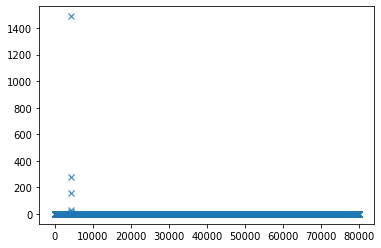

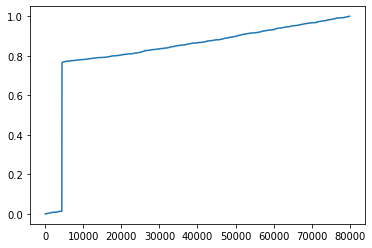

In [191]:
x,y=line_hist(batches.toa1,normalized=False,
              bins=np.linspace(0,80000,5000),
         linestyle='None')
plt.plot(x,np.cumsum(y)/np.cumsum(y)[-1])

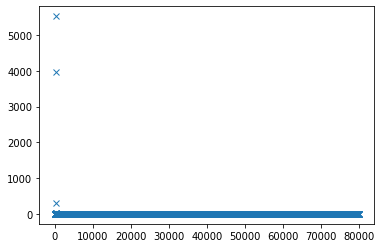

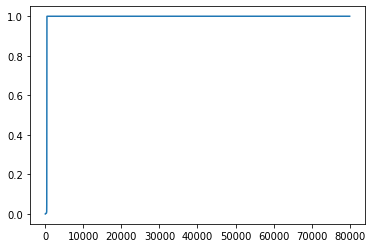

In [192]:
x,y=line_hist(batches.toa2,normalized=False,
              bins=np.linspace(0,80000,5000),
         linestyle='None')
plt.plot(x,np.cumsum(y)/np.cumsum(y)[-1])

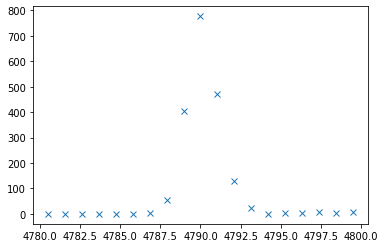

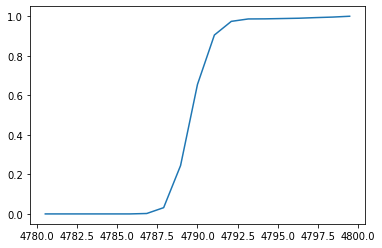

In [212]:
x,y=line_hist(batches.delta_t,normalized=False,
              bins=np.linspace(4780,4800,20),
         linestyle='None')
plt.plot(x,np.cumsum(y)/np.cumsum(y)[-1])

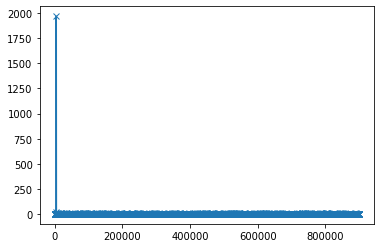

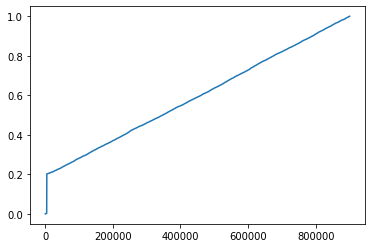

In [216]:
x,y=line_hist(batches.delta_t,normalized=False,
              bins=5000,
         linestyle=None)
plt.plot(x,np.cumsum(y)/np.cumsum(y)[-1])

<IPython.core.display.Javascript object>


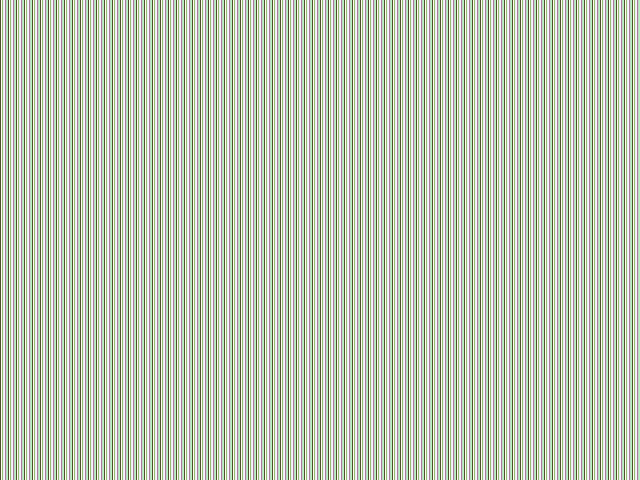

In [235]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
df = batches[(batches['delta_t']<4800) & (batches['delta_t']>4785)]
x = df['x']
y = df['y']
z = df['delta_t']

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("t")

ax.scatter(x, y, z)
plt.show()

In [244]:
%matplotlib inline